In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics.cluster import normalized_mutual_info_score 
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering

data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
data = data.drop('id',axis=1)
data = data.drop('Unnamed: 32',axis=1)
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
# Scaling the dataset
#datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
#datas.columns = list(data.iloc[:,1:32].columns)
#datas['diagnosis'] = data['diagnosis']
# Creating the high dimensional feature space X
data_drop = data.drop('diagnosis',axis=1)
X = data_drop.values

#Creating a 2D visualization to visualize the clusters
#from sklearn.manifold import TSNE
#tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
#Y = tsne.fit_transform(X)
Y = data['diagnosis']

Text(0.5, 1.0, 'Spectral clustering plot')

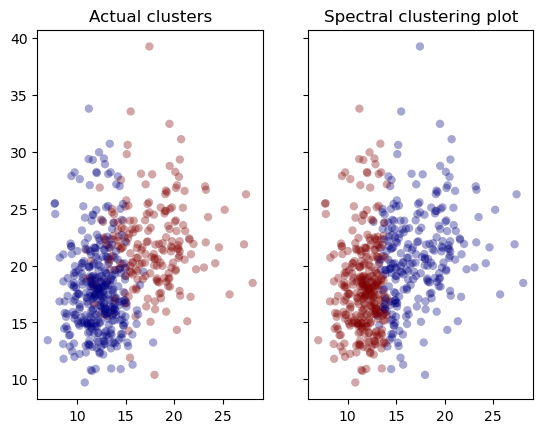

In [33]:

sc = SpectralClustering(n_clusters=2,n_neighbors=6, n_init=10, gamma=0.5, affinity="nearest_neighbors", assign_labels="kmeans").fit(X)
#sc_pred = sc.fit_predict(X)

predicted_labels = sc.labels_
n_clusters_ = len(set(predicted_labels)) - (1 if -1 in predicted_labels else 0)
n_noise_ = list (predicted_labels) .count (-1)
# Scatter plots
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=data["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=predicted_labels, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Spectral clustering plot")

In [34]:
print (f"Silhouette Coefficient: {metrics.silhouette_score(X, predicted_labels):.3f}") 
print (f"Normalized Mutual Info Score: {metrics.normalized_mutual_info_score (Y, predicted_labels):.3f}")

Silhouette Coefficient: 0.489
Normalized Mutual Info Score: 0.466


In [35]:
silhouette_coefficients = [0] * 10
NMI_scores = [0] * 10
for i in range (0, 10):
# X train, X test, y train, y test = train test split(X, y, test_ size=0.2, random state=1)
        clustering = SpectralClustering(n_clusters=2, n_neighbors = 6, affinity='nearest_neighbors', assign_labels='kmeans').fit(X)
        predicted_labels = clustering.labels_
        silhouette_coefficients[i] = metrics.silhouette_score(X, predicted_labels)
        NMI_scores[i] = metrics.normalized_mutual_info_score (Y, predicted_labels)
print (f"Average Silhouette Coefficient: {np.mean(silhouette_coefficients):.4f} +/- {np.std(silhouette_coefficients) : .4f}")
print (f"Average Normalized Mutual Info Score: {np.mean (NMI_scores): .4f} +/ - {np.std(NMI_scores):.4f}")

Average Silhouette Coefficient: 0.4876 +/-  0.0025
Average Normalized Mutual Info Score:  0.4641 +/ - 0.0049


<ErrorbarContainer object of 3 artists>

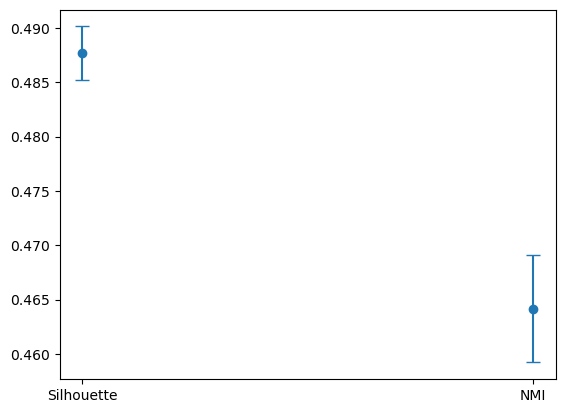

In [36]:
from matplotlib import pyplot as plt
avg = [np.mean (silhouette_coefficients), np.mean (NMI_scores)]
std = [np.std(silhouette_coefficients),np.std(NMI_scores)]
plt.errorbar (['Silhouette','NMI'], avg, marker="o", yerr=std, capsize=5, linestyle='')